## TensorFlow 2.0부터는 Keras가 TensorFlow의 공식 API로 통합. - TensorFlow를 사용하여 Keras 모델을 구성하는 방법

### Sequential 모델
Sequential 모델은 Keras에서 제공하는 가장 간단한 모델 구성 방법. Sequential 모델은 레이어를 순차적으로 쌓아 나가는 방식으로 모델을 구성. 각 레이어는 이전 레이어의 출력을 입력으로 받는다.하나의 입력과 하나의 출력을 가지는 단일 흐름의 모델을 만들기에 적합
- TensorFlow와 Keras 가져오기:
- Sequential 모델 생성:
Sequential 모델은 레이어를 선형으로 쌓아서 만드는 가장 간단한 모델입니다.
- 레이어 추가:
모델에 레이어를 추가하여 모델의 구조를 정의합니다. Keras에서는 다양한 유형의 레이어를 제공합니다. 예를 들어, Dense(완전 연결 레이어), Conv2D(2D 컨볼루션 레이어), LSTM(장기 단기 메모리 레이어) 등이 있습니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
- 모델 예측:
- 모델 저장 및 로드:

### Functional API

Functional API는 복잡한 모델 구조를 지원하며, 다양한 연결 및 분기 구조를 갖는 네트워크를 생성하는 데 유용

- TensorFlow와 필요한 모듈 가져오기:
- 입력 레이어 정의:
모델의 입력 레이어를 정의합니다.
- 레이어 구성:
다양한 레이어를 사용하여 모델의 구조를 정의합니다. 각 레이어는 이전 레이어의 출력을 입력으로 받습니다.
- 모델 생성:
입력과 출력을 지정하여 모델을 생성합니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
훈련 데이터를 사용하여 모델을 학습시킵니다. 입력 데이터와 해당 출력 데이터를 제공해야 합니다.
- 모델 예측:
- 모델 저장 및 로드:

In [181]:
# Sequential 방식

import tensorflow as tf
from tensorflow import keras

# model = keras.models.Sequential()

# model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(input_dim,)))
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dense(units=10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

# model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# predictions = model.predict(x_test)

# model.save('my_model.h5')  # 모델 저장
# loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

In [182]:
# 함수 방식

# import tensorflow as tf
# from tensorflow import keras

# inputs = keras.Input(shape=(input_dim,))

# x = keras.layers.Dense(units=64, activation='relu')(inputs)
# x = keras.layers.Dense(units=32, activation='relu')(x)
# outputs = keras.layers.Dense(units=10, activation='softmax')(x)

# model = keras.Model(inputs=inputs, outputs=outputs)

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

# model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# predictions = model.predict(x_test)

# model.save('my_model.h5')  # 모델 저장
# loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

### 영화 리뷰 분류 : 이진 분류 예제

IMBD 데이터

로드

In [183]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000
)

In [184]:
train_data.shape

(25000,)

In [185]:
len(train_data[0])

218

In [186]:
# 각 word 의 인덱스

train_data[0][:5]

[1, 14, 22, 16, 43]

In [187]:
import numpy as np

np.max(train_data[0])

7486

In [188]:
train_labels[0]

1

In [189]:
max([max(sequence) for sequence in train_data])

9999

리뷰를 다시 텍스트로 디코딩

In [190]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]
)

In [191]:
decoded_review[0: 218]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director "

### 데이터 준비

정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [192]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [193]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [194]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [195]:
np.sum(x_train[0])

120.0

In [196]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들

In [197]:

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

모델 컴파일

In [198]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 훈련검증

검증 세트 준비하기

In [199]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델 훈련하기

In [200]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5387 - accuracy: 0.7581 - val_loss: 0.4100 - val_accuracy: 0.8605
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3329 - accuracy: 0.8944 - val_loss: 0.3299 - val_accuracy: 0.8738
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2458 - accuracy: 0.9190 - val_loss: 0.2906 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2011 - accuracy: 0.9306 - val_loss: 0.2739 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1663 - accuracy: 0.9446 - val_loss: 0.2759 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1430 - accuracy: 0.9539 - val_loss: 0.3220 - val_accuracy: 0.8746
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1236 - accuracy: 0.9601 - val_loss: 0.2908 - val_accuracy: 0.8857
Epoch 8/20
30

In [201]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

훈련과 검증 손실 그리기

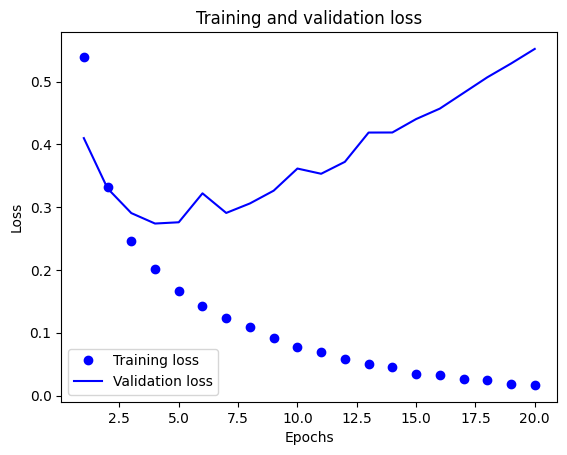

In [202]:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

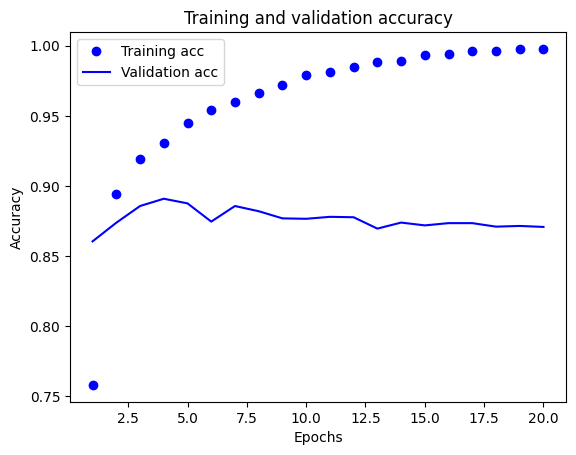

In [203]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



모델을 처음부터 다시 훈련하기



In [204]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 11ms/step - loss: 0.4625 - accuracy: 0.8144
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2739 - accuracy: 0.9049
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2151 - accuracy: 0.9226
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2855 - accuracy: 0.8856


In [205]:
results

[0.28552088141441345, 0.8855599761009216]

훈련된 모델로 새로운 데이터에 대해 예측하기

In [206]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.21951655],
       [0.9995672 ],
       [0.73235714],
       ...,
       [0.07306537],
       [0.06093243],
       [0.5799168 ]], dtype=float32)

추가 실험

뉴스 기사 분류: 다중 분류 문제

로이터 데이터셋

로이터 데이터셋 로드하기

In [207]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [208]:
len(train_data)


8982

In [209]:

len(test_data)

2246

In [210]:

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

로이터 데이터셋을 텍스트로 디코딩하기

In [211]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [212]:
train_labels[10]

3

### 데이터 준비

In [213]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [214]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [215]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [216]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [217]:

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


훈련 검증

검증 세트 준비하기

In [218]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

모델 훈련하기

In [219]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.6902 - accuracy: 0.5144 - val_loss: 1.8560 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5796 - accuracy: 0.6823 - val_loss: 1.4142 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.2187 - accuracy: 0.7429 - val_loss: 1.2127 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9969 - accuracy: 0.7915 - val_loss: 1.1022 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8282 - accuracy: 0.8231 - val_loss: 1.0162 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6964 - accuracy: 0.8514 - val_loss: 0.9665 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5791 - accuracy: 0.8761 - val_loss: 0.9308 - val_accuracy: 0.8070
Epoch 8/20
16

훈련과 검증 손실 그리기

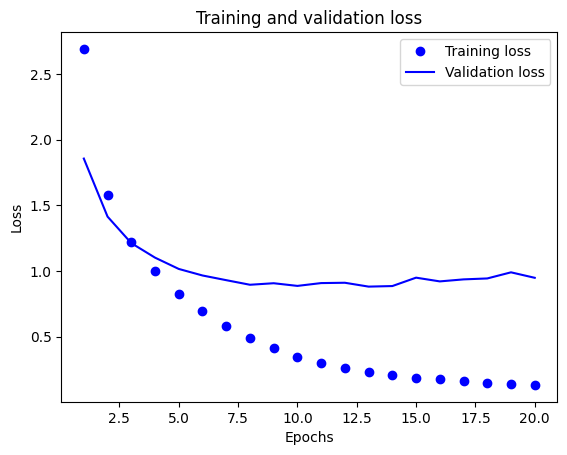

In [220]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


훈련과 검증 정확도 그리기

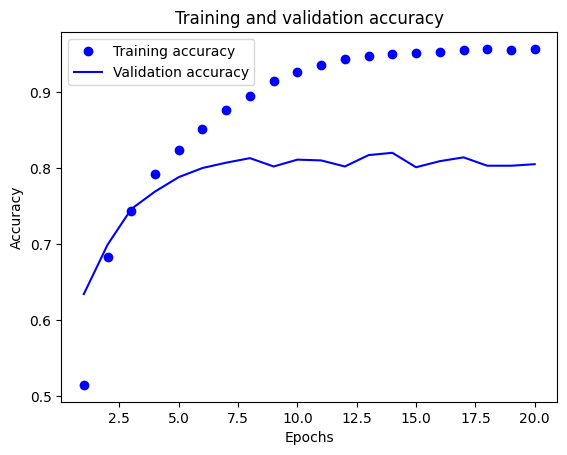

In [221]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

모델을 처음부터 다시 훈련하기

In [222]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 11ms/step - loss: 2.6093 - accuracy: 0.5169
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.4444 - accuracy: 0.6904
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.1199 - accuracy: 0.7582
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.9214 - accuracy: 0.8005
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.7607 - accuracy: 0.8373
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.6344 - accuracy: 0.8626
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5269 - accuracy: 0.8867
Epoch 8/9
18/18 [==============================] - 0s 11ms/step - loss: 0.4389 - accuracy: 0.9047
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9225 - accuracy: 0.7894


In [223]:
results

[0.9224646091461182, 0.7894033789634705]

In [224]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1767586821015138

새로운 데이터로 예측하기

In [225]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [226]:
predictions[0].shape
(46,)

(46,)

In [227]:
np.sum(predictions[0])

1.0000001

In [228]:
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 다른 방법

In [229]:

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [230]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

충분히 큰 중간 층을 두어야 하는 이유

정보 병목이 있는 모델

In [231]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 3.4108 - accuracy: 0.3686 - val_loss: 3.0462 - val_accuracy: 0.5480
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.7632 - accuracy: 0.5725 - val_loss: 2.6771 - val_accuracy: 0.6080
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.4556 - accuracy: 0.6318 - val_loss: 2.5062 - val_accuracy: 0.6450
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 2.2278 - accuracy: 0.5599 - val_loss: 2.2582 - val_accuracy: 0.3850
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7973 - accuracy: 0.4538 - val_loss: 1.6615 - val_accuracy: 0.6640
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1855 - accuracy: 0.7316 - val_loss: 1.3020 - val_accuracy: 0.6860
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9854 - accuracy: 0.7618 - val_loss: 1.2716 - val_accuracy: 0.7130
Epoch 8/20
63/63 [==

- 뉴런은 입력 데이터에서 학습된 가중치와 편향을 사용하여 출력을 계산합니다. units는 해당 레이어의 출력 차원 또는 뉴런의 개수를 결정
- 가중치의 수는 이전 레이어의 units 수와 현재 레이어의 units 수에 따라 결정됩니다. 이전 레이어의 각 뉴런과 현재 레이어의 각 뉴런 사이에 가중치가 존재하므로, 가중치의 수는 이 연결의 수와 동일
- units 수는 레이어의 출력 차원 또는 뉴런의 개수를 나타내고, 가중치의 수는 모델의 구조와 연결에 따라 결정됩니다. 가중치의 수는 units 수와 일치하지 않을 수 있습니다.
추가 실험